In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("AB_NYC_2019.csv")


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [4]:
# Drop duplicates
df = df.drop_duplicates()

# Remove invalid prices
df = df[df['price'] > 0]

# Fill missing values
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['last_review'] = df['last_review'].fillna("Unknown")


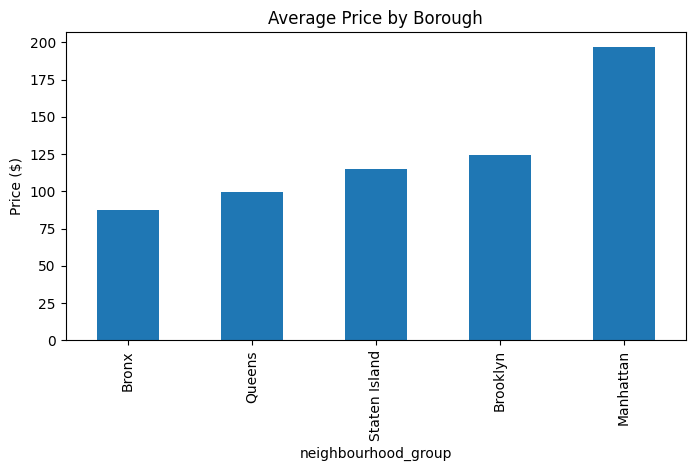

In [5]:
df.groupby('neighbourhood_group')['price'].mean().sort_values().plot(
    kind='bar', figsize=(8,4), title='Average Price by Borough'
)
plt.ylabel("Price ($)")
plt.show()


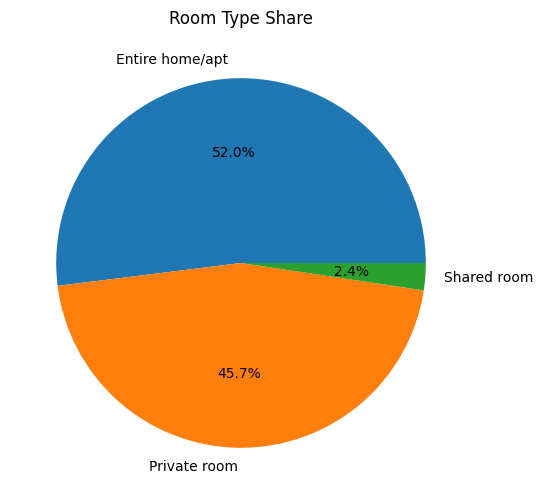

In [6]:
df['room_type'].value_counts(normalize=True).plot(
    kind='pie', autopct='%1.1f%%', figsize=(6,6)
)
plt.title("Room Type Share")
plt.ylabel("")
plt.show()


In [7]:
df['availability_365'].describe()


count    48884.000000
mean       112.779498
std        131.627271
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

In [8]:
neigh_df = df.groupby(
    ['neighbourhood_group', 'neighbourhood']
).agg(
    avg_price=('price', 'mean'),
    avg_availability=('availability_365', 'mean'),
    total_reviews=('number_of_reviews', 'sum'),
    listings=('id', 'count')
).reset_index()


In [9]:
neigh_df['reviews_per_listing'] = (
    neigh_df['total_reviews'] / neigh_df['listings']
)


In [10]:
neigh_df['value_score'] = (
    neigh_df['avg_availability'] *
    neigh_df['reviews_per_listing']
) / neigh_df['avg_price']


In [11]:
neigh_df = neigh_df.sort_values(
    by='value_score', ascending=False
)


In [12]:
top_undervalued = neigh_df.head(10)
top_overpriced = neigh_df.tail(10)


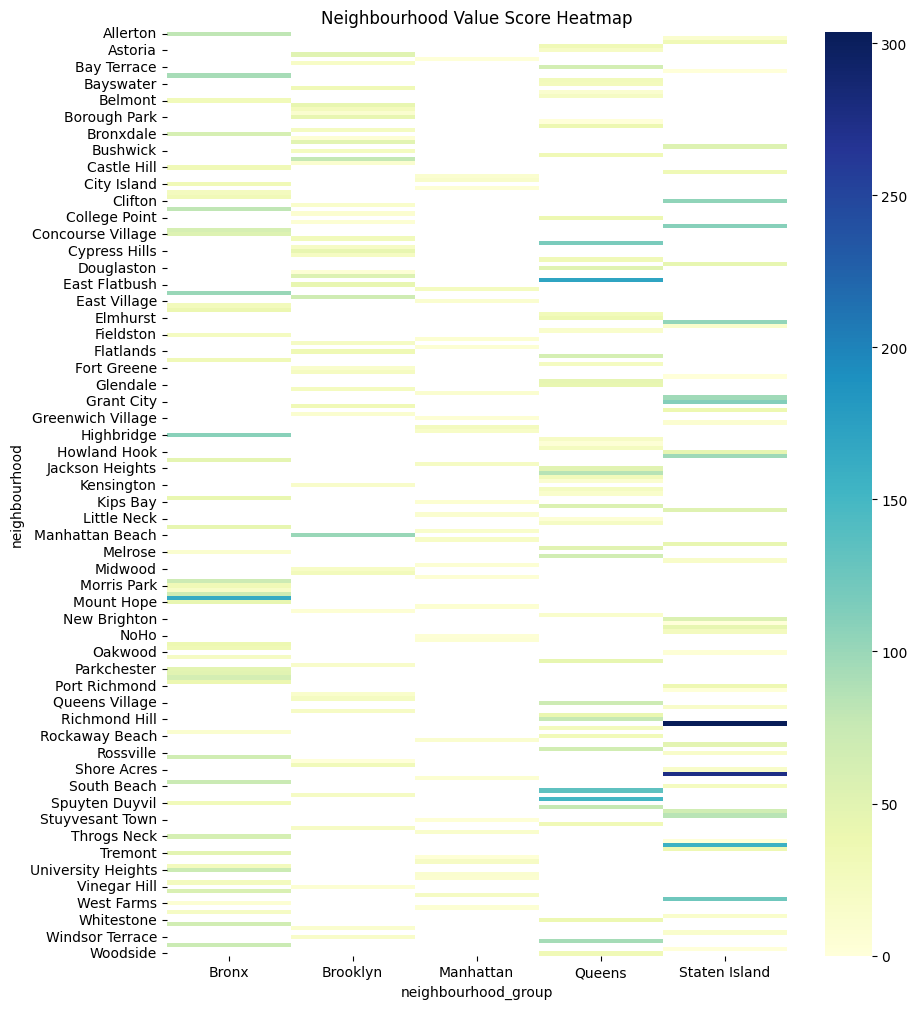

In [13]:
heatmap_data = neigh_df.pivot_table(
    values='value_score',
    index='neighbourhood',
    columns='neighbourhood_group'
)

plt.figure(figsize=(10,12))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title("Neighbourhood Value Score Heatmap")
plt.show()


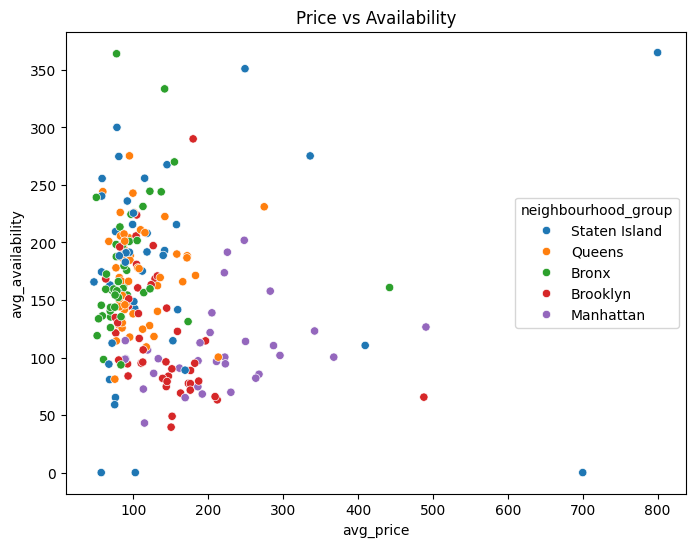

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=neigh_df,
    x='avg_price',
    y='avg_availability',
    hue='neighbourhood_group'
)
plt.title("Price vs Availability")
plt.show()


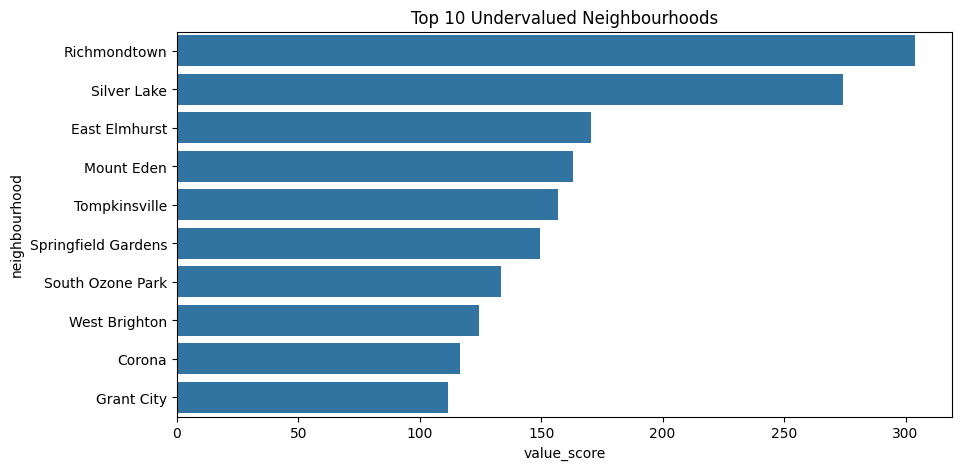

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=top_undervalued,
    x='value_score',
    y='neighbourhood'
)
plt.title("Top 10 Undervalued Neighbourhoods")
plt.show()
